## 活性化関数
#### シグモイド関数

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

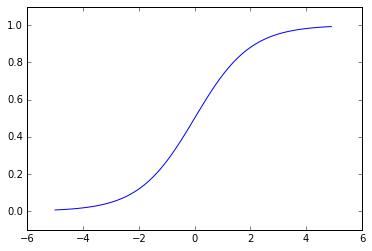

In [3]:
x = np.arange( -5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x,y)
plt.ylim(-0.1,1.1) #y軸の範囲を指定
plt.show()

#### ReLU

In [4]:
def relu(x):
    return np.maximum(0,x)

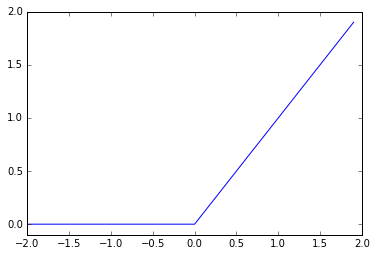

In [5]:
x = np.arange( -2.0, 2.0, 0.1)
y = relu(x)
plt.plot(x,y)
plt.ylim(-0.1,2) #y軸の範囲を指定
plt.show()

## 3層ニューラルネットワーク

In [6]:
X = np.array([1.0, 0.5])                          #入力信号
W1 = np.array([[0.1, 0.3, 0.5],[0.2, 0.4, 0.6]])  #重み 2次元 -> 3次元
B1 = np.array([0.1, 0.2, 0.3])                    #バイアス
W2 = np.array([[0.1, 0.4],[0.2, 0.5],[0.3, 0.6]]) #重み 3次元 -> 2次元
B2 = np.array([0.1, 0.2])                         #バイアス
W3 = np.array([[0.1, 0.3],[0.2, 0.4]])            #重み 2次元 -> 2次元
B3 = np.array([0.1, 0.2])                         #バイアス


A1 = np.dot(X,W1)+B1
print 'A1',A1

Z1 = sigmoid(A1)
print 'Z1',Z1

A2 = np.dot(Z1,W2) + B2
print 'A2',A2

Z2 = sigmoid(A2)
print 'Z2',Z2

A3 = np.dot(Z2,W3) + B3
print 'A3',A3

Y = A3 # そのまま出力

A1 [ 0.3  0.7  1.1]
Z1 [ 0.57444252  0.66818777  0.75026011]
A2 [ 0.51615984  1.21402696]
Z2 [ 0.62624937  0.7710107 ]
A3 [ 0.31682708  0.69627909]


In [7]:
def init_network():
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5],[0.2, 0.4, 0.6]])  #重み 2次元 -> 3次元
    network['B1'] = np.array([0.1, 0.2, 0.3])                    #バイアス
    network['W2'] = np.array([[0.1, 0.4],[0.2, 0.5],[0.3, 0.6]]) #重み 3次元 -> 2次元
    network['B2'] = np.array([0.1, 0.2])                         #バイアス
    network['W3'] = np.array([[0.1, 0.3],[0.2, 0.4]])            #重み 2次元 -> 2次元
    network['B3'] = np.array([0.1, 0.2])                         #バイアス
    return network

def forward(network, x):
    W1,W2,W3 = network['W1'], network['W2'], network['W3']
    B1,B2,B3 = network['B1'], network['B2'], network['B3']
    a1 = np.dot(x, W1) + B1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + B2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + B3
    return a3

In [8]:
network = init_network()
x = np.array([1.0, 0.5])
y = forward(network,x)
print (y)

[ 0.31682708  0.69627909]


In [9]:
x = np.arange(100)
step = 3
for i in range(0,100,step):
    y = x[i:i+step]
    print i,i+step,y

0 3 [0 1 2]
3 6 [3 4 5]
6 9 [6 7 8]
9 12 [ 9 10 11]
12 15 [12 13 14]
15 18 [15 16 17]
18 21 [18 19 20]
21 24 [21 22 23]
24 27 [24 25 26]
27 30 [27 28 29]
30 33 [30 31 32]
33 36 [33 34 35]
36 39 [36 37 38]
39 42 [39 40 41]
42 45 [42 43 44]
45 48 [45 46 47]
48 51 [48 49 50]
51 54 [51 52 53]
54 57 [54 55 56]
57 60 [57 58 59]
60 63 [60 61 62]
63 66 [63 64 65]
66 69 [66 67 68]
69 72 [69 70 71]
72 75 [72 73 74]
75 78 [75 76 77]
78 81 [78 79 80]
81 84 [81 82 83]
84 87 [84 85 86]
87 90 [87 88 89]
90 93 [90 91 92]
93 96 [93 94 95]
96 99 [96 97 98]
99 102 [99]


## 出力層

#### ソフトマックス関数

In [5]:
def softmax(a):
    max_a = np.max(a) #桁溢れを防ぐために最大値を利用
    exp_a = np.exp(a - max_a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y

In [7]:
## test of softmax()
## ソフトマックスは全要素の合計1となるので確率として解釈できる
## ソフトマックスのニューロン数は、クラス数とする

a = np.array([0.3, 2.9, 4.0])
y = softmax(a)
print y
print np.sum(y)

[ 0.01821127  0.24519181  0.73659691]
1.0
